<a href="https://colab.research.google.com/github/HARSHGit45/Deep-Learning-Neural-Networks/blob/main/Sentiment_Analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense , Dropout , Bidirectional , BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import spacy


In [2]:
df_train = pd.read_csv('twitter_training.csv')

In [3]:
df_test = pd.read_csv('twitter_validation.csv')

In [4]:
df_train.columns = ['Header1','Company','label','text']

df_test.columns = ['Header1','Company','label','text']

In [5]:
df_train.head()

,Header1,Company,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df_train.dropna()

,Header1,Company,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
df_train.drop(columns=['Header1', 'Company'], inplace=True)

df_test.drop(columns=['Header1', 'Company'], inplace=True)

In [8]:
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove special characters, numbers, and punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    return tweet

In [9]:
df_train['text'] = df_train['text'].astype(str).apply(clean_tweet)
df_test['text'] = df_test['text'].astype(str).apply(clean_tweet)


In [10]:
df_train.head()

,label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you all
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands and i will murder yo...
4,Positive,im getting into borderlands and i can murder y...


In [11]:
df_train['text'] = df_train['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

In [12]:
df_train = df_train.dropna(subset=['text'])
df_test = df_test.dropna(subset=['text'])

df_train = df_train[df_train['text'].str.strip() != '']
df_test = df_test[df_test['text'].str.strip() != '']


df_train.head()

,label,text
0,Positive,i am coming to the borders and i will kill you...
1,Positive,im getting on borderlands and i will kill you all
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands and i will murder yo...
4,Positive,im getting into borderlands and i can murder y...


In [13]:
df_train = df_train.drop_duplicates(subset=['text'])

df_train.shape

(66388, 2)

In [14]:
train_texts = df_train['text'].values
train_labels = df_train['label'].values



test_texts = df_test['text'].values
test_labels = df_test['label'].values

In [15]:
le = LabelEncoder()

trn_label = le.fit_transform(train_labels)
txt_label = le.fit_transform(test_labels)

In [16]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(train_texts)
tokenizer.fit_on_texts(test_texts)

In [17]:
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [18]:
maxlen = max(len(tokens) for tokens in train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 166


In [19]:
train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

In [20]:
input_size = np.max(train_padded) + 1
input_size

29386

In [21]:
model = Sequential()


model.add(Embedding(input_dim=input_size,output_dim=100,input_shape=(56,)))

model.add(Bidirectional(LSTM(128, kernel_regularizer=l2(0.1), return_sequences=True, recurrent_regularizer=l2(0.1))))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01))))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))


model.add(Dropout(0.5))


model.add(Dense(5, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 56, 100)             │       2,938,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 56, 256)             │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 56, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,347,565 (12.77 MB)

 Trainable params: 3,346,797 (12.77 MB)

 Non-trainable params: 768 (3.00 KB)

In [23]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_padded,
    trn_label ,
    validation_data=(test_padded,txt_label),
    epochs=20
)

Epoch 1/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.4087 - loss: 8.7109 - val_accuracy: 0.7938 - val_loss: 0.6862
Epoch 2/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - accuracy: 0.7660 - loss: 0.7635 - val_accuracy: 0.7678 - val_loss: 0.8140
Epoch 3/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 67s 32ms/step - accuracy: 0.8394 - loss: 0.5838 - val_accuracy: 0.8178 - val_loss: 0.5913
Epoch 4/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8633 - loss: 0.5005 - val_accuracy: 0.8368 - val_loss: 0.5522
Epoch 5/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8842 - loss: 0.4381 - val_accuracy: 0.8719 - val_loss: 0.4593
Epoch 6/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.8932 - loss: 0.4094 - val_accuracy: 0.9129 - val_loss: 0.3811
Epoch 7/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9037 - loss: 0.3767 - val_accuracy: 0.8078 - val_loss: 0.7012
Epoch 8/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9116 -

In [34]:
test_loss, test_accuracy = model.evaluate(test_padded , txt_label)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9067 - loss: 0.3873
Test Loss: 0.4067220389842987
Test Accuracy: 0.9149149060249329


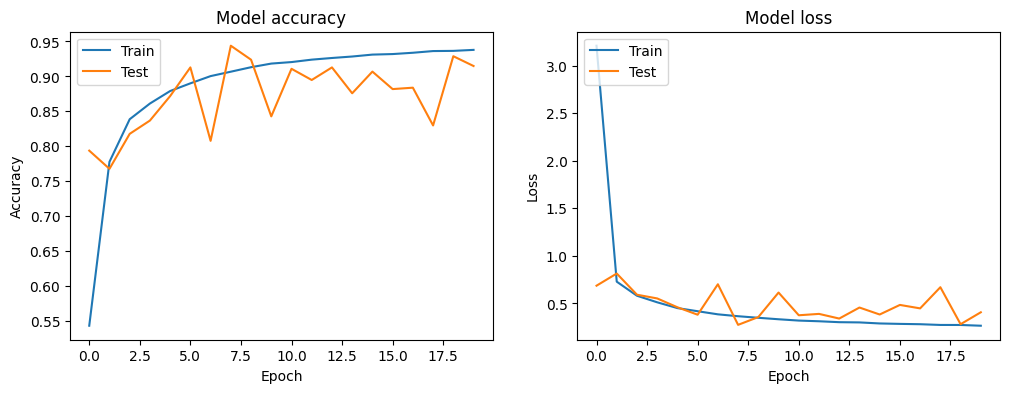

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()